In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing python library

In [2]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import random
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading Dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Academic/PR lab water/water_potability.csv')
data.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  5.216523  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
print("There are {} rows and {} features in Water Potability Dataset.".format(data.shape[0], data.shape[1]))

There are 3276 rows and 10 features in Water Potability Dataset.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2786 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
seeed = 90
random.seed(seeed)

# Exploratory Data Analysis (EDA)

In [7]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2786.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080125   196.369496  22014.092526     7.122277   333.775777   
std       1.594425    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.091810   176.850538  15666.690300     6.127421   307.699498   
50%       7.035894   196.967627  20927.833605     7.130299   333.073546   
75%       8.061702   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

**Randomization**

In [8]:
# def doingRandom(df,variable):
#     df[variable + "_nullfill_random"] = df[variable]
#     random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)
#     random_sample.index=df[df[variable].isnull()].index
#     df.loc[df[variable].isnull(),variable + '_nullfill_random'] = random_sample




def doingRandom(df, variable):
    df[variable + "_nullfill_random"] = df[variable]
    df[variable + "_nullfill_random"].fillna(df[variable].dropna().sample(df[variable].isnull().sum(), random_state = seeed))


**Interpolation**

In [9]:
def doingInterpolation(df, variable):
    df[variable + "_nullfill_interpolated"] = df[variable].interpolate()

**Most Frequent values**

In [10]:
def doingMostFrequent(df, variable):
    most_frequent = df[variable].mode()[0]
    df[variable+"_nullfill_mostfrequent"] = df[variable].fillna(most_frequent)


**K Nearest Neighbors**

In [11]:
def doingKNNImputation(df, variable):
    imputer = KNNImputer(n_neighbors = 5)
    df[variable + "_nullfill_knn"] = imputer.fit_transform(df[[variable]])

**Null values**

**Step:** Detections

In [12]:
nullData = pd.DataFrame({'Feature' : data.columns, 'Null' : data.isnull().any()})
print(nullData.to_string(index = False).replace(' ', '  '))

                Feature    Null
                          ph    True
              Hardness  False
                  Solids  False
        Chloramines  False
                Sulfate    True
      Conductivity  False
  Organic_carbon  False
Trihalomethanes    True
            Turbidity  False
          Potability  False


In [13]:
nullData = pd.DataFrame({'Feature' : data.columns, 'Null' : data.isnull().sum()})
print(nullData.to_string(index = False).replace(' ', '  '))

                Feature    Null
                          ph      490
              Hardness          0
                  Solids          0
        Chloramines          0
                Sulfate      781
      Conductivity          0
  Organic_carbon          0
Trihalomethanes      162
            Turbidity          0
          Potability          0


In [14]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print("There are {} null values in {} column".format(data[i].isnull().sum(), i))

There are 490 null values in ph column
There are 781 null values in Sulfate column
There are 162 null values in Trihalomethanes column


**Step:** Visualization

<Axes: >

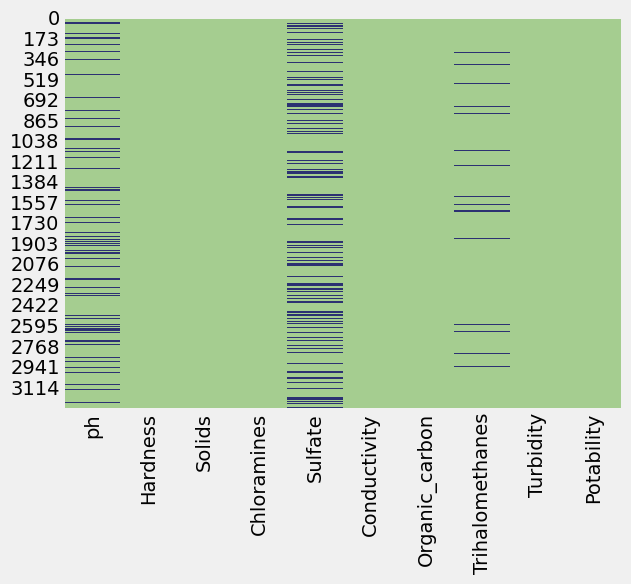

In [15]:
sns.heatmap(data.isnull(), cbar = False, cmap = 'crest')

**Step:** Handeling null values

## pH

In [16]:
print(data['ph'].describe())

count    2786.000000
mean        7.080125
std         1.594425
min         0.000000
25%         6.091810
50%         7.035894
75%         8.061702
max        14.000000
Name: ph, dtype: float64


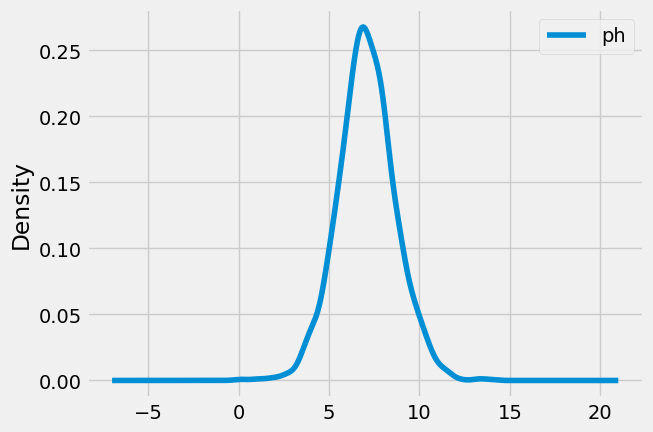

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['ph'].plot(kind = 'kde')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels)
plt.show()

Filling the missing values of pH by mean

In [18]:
mean_value = data['ph'].mean()
data['ph_nullfill_mean']=data['ph'].fillna(mean_value)

Filling the missing values of pH with random values

In [19]:
doingRandom(data,"ph")

Filling the missing values of pH by interpolation

In [20]:
doingInterpolation(data,"ph")

Filling the missing values of pH by maximum

In [21]:
max_value = data['ph'].max()
data['ph_nullfill_max']=data['ph'].fillna(max_value)

Filling the missing values of pH by minimum

In [22]:
min_value = data['ph'].min()
data['ph_nullfill_min']=data['ph'].fillna(min_value)

Filling the missing values of pH by the most frequent values

In [23]:
doingMostFrequent(data, "ph")

Filling the missing values of pH using K nearest neighbors (KNN)

In [24]:
doingKNNImputation(data, "ph")

**Plot**

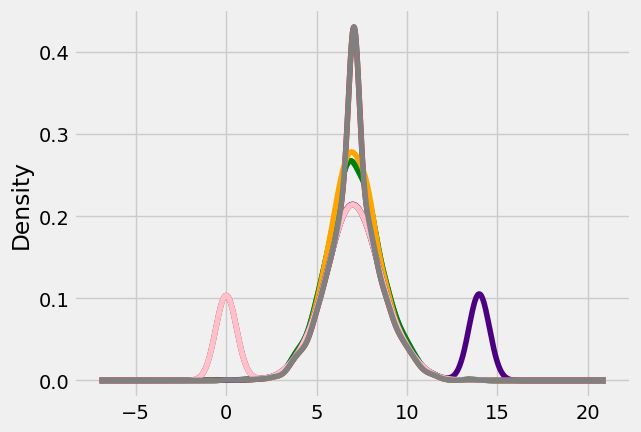

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['ph'].plot(kind = 'kde')
data.ph_nullfill_mean.plot(kind = 'kde', color = 'red')
data.ph_nullfill_random.plot(kind = 'kde', color = 'green')
data.ph_nullfill_interpolated.plot(kind = 'kde', color = 'orange')
data.ph_nullfill_max.plot(kind = 'kde', color = 'indigo')
data.ph_nullfill_min.plot(kind = 'kde', color = 'brown')
data.ph_nullfill_mostfrequent.plot(kind = 'kde', color = 'pink')
data.ph_nullfill_knn.plot(kind = 'kde', color = 'gray')
lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels)
plt.show()

In [26]:
data = data.drop(['ph','ph_nullfill_mean','ph_nullfill_random','ph_nullfill_max', 'ph_nullfill_min', 'ph_nullfill_mostfrequent', 'ph_nullfill_knn'], axis = 1)

In [27]:
# import pandas as pd
# null_row = data.index[data['ph_nullfill_interpolated'].isnull()].tolist()[0]
# print(null_row)
# data.head(10)

In [28]:
# data.drop(null_row)

In [29]:
# for i in data.columns:
#     if data[i].isnull().sum() > 0:
#         print("There are {} null values in {} column".format(data[i].isnull().sum(), i))

## Sulfate

In [30]:
print(data['Sulfate'].describe())

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64


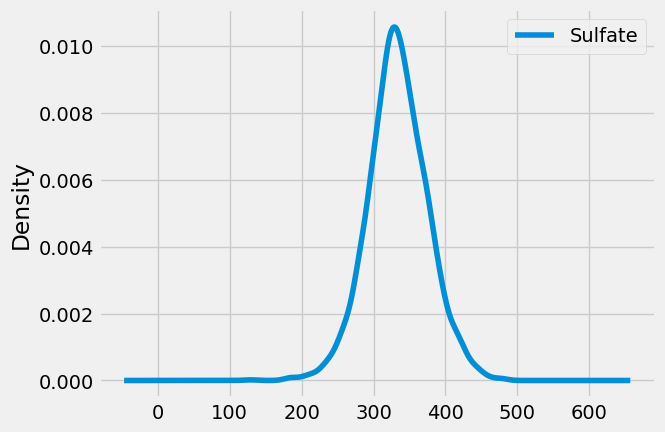

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Sulfate'].plot(kind='kde')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels)
plt.show()

Filling the missing values of Sulfate by mean

In [32]:
mean_value = data['Sulfate'].mean()
data['Sulfate_nullfill_mean']=data['Sulfate'].fillna(mean_value)

Filling the missing values of Sulfate with random values

In [33]:
doingRandom(data,"Sulfate")

Filling the missing values of Sulfate by interpolation

In [34]:
doingInterpolation(data,"Sulfate")

Filling the missing values of Sulfate by maximum

In [35]:
max_value = data['Sulfate'].max()
data['Sulfate_nullfill_max'] = data['Sulfate'].fillna(max_value)

Filling the missing values of Sulfate by minimum

In [36]:
min_value = data['Sulfate'].min()
data['Sulfate_nullfill_min'] = data['Sulfate'].fillna(min_value)

Filling the missing values of Sulfate by the most frequent values

In [37]:
doingMostFrequent(data, "Sulfate")

Filling the missing values of Sulfate using K nearest neighbors (KNN)

In [38]:
doingKNNImputation(data, "Sulfate")

**Plot**

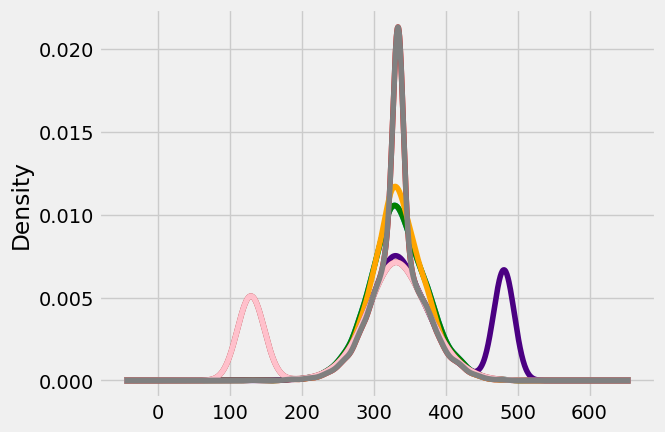

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Sulfate'].plot(kind = 'kde')
data.Sulfate_nullfill_mean.plot(kind = 'kde', color = 'red')
data.Sulfate_nullfill_random.plot(kind = 'kde', color = 'green')
data.Sulfate_nullfill_interpolated.plot(kind = 'kde', color = 'orange')
data.Sulfate_nullfill_max.plot(kind = 'kde', color = 'indigo')
data.Sulfate_nullfill_min.plot(kind = 'kde', color = 'brown')
data.Sulfate_nullfill_mostfrequent.plot(kind = 'kde', color = 'pink')
data.Sulfate_nullfill_knn.plot(kind = 'kde', color = 'gray')
lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels)
plt.show()

In [40]:
data = data.drop(['Sulfate','Sulfate_nullfill_mean', 'Sulfate_nullfill_random','Sulfate_nullfill_max', 'Sulfate_nullfill_min', 'Sulfate_nullfill_mostfrequent', 'Sulfate_nullfill_knn'], axis = 1)

## Trihalomethanes

In [41]:
print(data['Trihalomethanes'].describe())

count    3114.000000
mean       66.396293
std        16.175008
min         0.738000
25%        55.844536
50%        66.622485
75%        77.337473
max       124.000000
Name: Trihalomethanes, dtype: float64


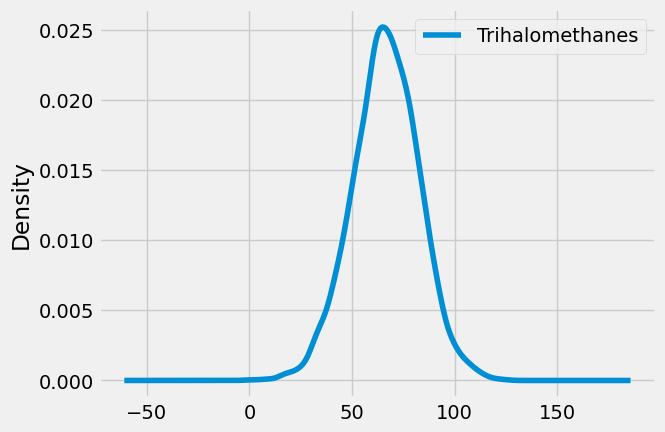

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Trihalomethanes'].plot(kind = 'kde')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels)
plt.show()

Filling the missing values of Trihalomethanes by mean

In [43]:
mean_value = data['Trihalomethanes'].mean()
data['Trihalomethanes_nullfill_mean'] = data['Trihalomethanes'].fillna(mean_value)

Filling the missing values of Trihalomethanes with random values

In [44]:
doingRandom(data,"Trihalomethanes")

Filling the missing values of Trihalomethanes by interpolation

In [45]:
doingInterpolation(data,"Trihalomethanes")

Filling the missing values of Trihalomethanes by maximum

In [46]:
max_value = data['Trihalomethanes'].max()
data['Trihalomethanes_nullfill_max'] = data['Trihalomethanes'].fillna(max_value)

Filling the missing values of Trihalomethanes by minimum

In [47]:
min_value = data['Trihalomethanes'].min()
data['Trihalomethanes_nullfill_min'] = data['Trihalomethanes'].fillna(min_value)

Filling the missing values of Trihalomethanes by the most frequent values

In [48]:
doingMostFrequent(data, "Trihalomethanes")

Filling the missing values of Trihalomethanes using K nearest neighbors (KNN)

In [49]:
doingKNNImputation(data, "Trihalomethanes")

**Plot**

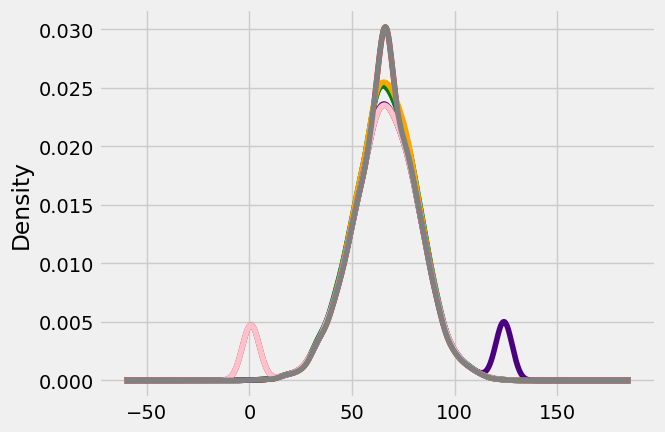

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Trihalomethanes'].plot(kind = 'kde')
data.Trihalomethanes_nullfill_mean.plot(kind = 'kde', color = 'red')
data.Trihalomethanes_nullfill_random.plot(kind = 'kde', color = 'green')
data.Trihalomethanes_nullfill_interpolated.plot(kind = 'kde', color = 'orange')
data.Trihalomethanes_nullfill_max.plot(kind = 'kde', color = 'indigo')
data.Trihalomethanes_nullfill_min.plot(kind = 'kde', color = 'brown')
data.Trihalomethanes_nullfill_mostfrequent.plot(kind = 'kde', color = 'pink')
data.Trihalomethanes_nullfill_knn.plot(kind = 'kde', color = 'gray')
lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels)
plt.show()

In [51]:
data = data.drop(['Trihalomethanes','Trihalomethanes_nullfill_mean', 'Trihalomethanes_nullfill_random','Trihalomethanes_nullfill_max', 'Trihalomethanes_nullfill_min', 'Trihalomethanes_nullfill_mostfrequent', 'Trihalomethanes_nullfill_knn'], axis = 1)

In [52]:
data.describe()

Hardness        Solids  Chloramines  Conductivity  Organic_carbon  \
count  3276.000000   3276.000000  3276.000000   3276.000000     3276.000000   
mean    196.369496  22014.092526     7.122277    426.205111       14.284970   
std      32.879761   8768.570828     1.583085     80.824064        3.308162   
min      47.432000    320.942611     0.352000    181.483754        2.200000   
25%     176.850538  15666.690300     6.127421    365.734414       12.065801   
50%     196.967627  20927.833605     7.130299    421.884968       14.218338   
75%     216.667456  27332.762125     8.114887    481.792305       16.557652   
max     323.124000  61227.196010    13.127000    753.342620       28.300000   

         Turbidity   Potability  ph_nullfill_interpolated  \
count  3276.000000  3276.000000               3276.000000   
mean      3.966786     0.390110                  7.069456   
std       0.780382     0.487849                  1.533610   
min       1.450000     0.000000                  0.000000   
25%       3.439711     0.000000                  6.117357   
50%       3.955028     0.000000                  7.034491   
75%       4.500320     1.000000                  7.992100   
max       6.739000     1.000000                 14.000000   

       Sulfate_nullfill_interpolated  Trihalomethanes_nullfill_interpolated  
count                    3276.000000                            3276.000000  
mean                      333.741509                              66.461927  
std                        38.870128                              15.980497  
min                       129.000000                               0.738000  
25%                       310.174409                              55.988340  
50%                       332.960442                              66.691179  
75%                       357.388145                              77.215957  
max                       481.030642                             124.000000

In [53]:
flag = 0
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print("There are {} null values in {} column".format(data[i].isnull().sum(), i))
    else:
        flag = 1

if flag == 1:
    print("No null values found")

No null values found


# Data Preprocessing

**Step:** Slicing

In [54]:
X = data.drop(['Potability'], axis = 1)
y = data['Potability']

**Step:** Feature Scaling

In [55]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [56]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size = 0.8, random_state = seeed)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, train_size = 0.5, random_state = seeed)

print("Training data shape: {}, Labels: {}".format(x_train.shape, y_train.shape))
print("Testing data shape: {}, Labels: {}".format(x_test.shape, y_test.shape))
print("Validation data shape: {}, Labels: {}".format(x_val.shape, y_val.shape))

Training data shape: (2620, 9), Labels: (2620,)
Testing data shape: (328, 9), Labels: (328,)
Validation data shape: (328, 9), Labels: (328,)


## Modeling

#**Logistic Regression**

In [57]:
log = LogisticRegression(random_state = seeed).fit(x_train, y_train)

In [58]:
val_score = log.score(x_val, y_val)
print("Validation accuracy:", val_score)

Validation accuracy: 0.6310975609756098


In [59]:
y_test_pred = log.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.6097560975609756


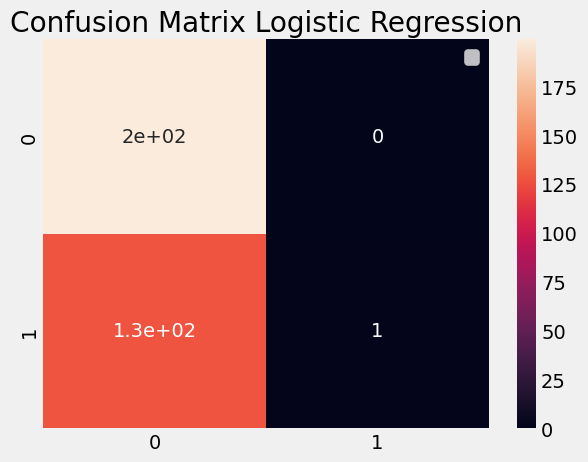

In [60]:
pred1 = log.predict(x_test)
plt.title("Confusion Matrix Logistic Regression")
sns.heatmap(confusion_matrix(y_test,pred1), annot = True)
plt.legend()
plt.show()

In [61]:
report = classification_report(y_test, pred1)

print("Classification Report for Logistic Regression:\n")
print(report)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       199
           1       1.00      0.01      0.02       129

    accuracy                           0.61       328
   macro avg       0.80      0.50      0.39       328
weighted avg       0.76      0.61      0.47       328



#**K Nearest Neighbours**

In [62]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
y_val_pred = knn.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.625


In [64]:
y_test_pred = knn.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.6280487804878049


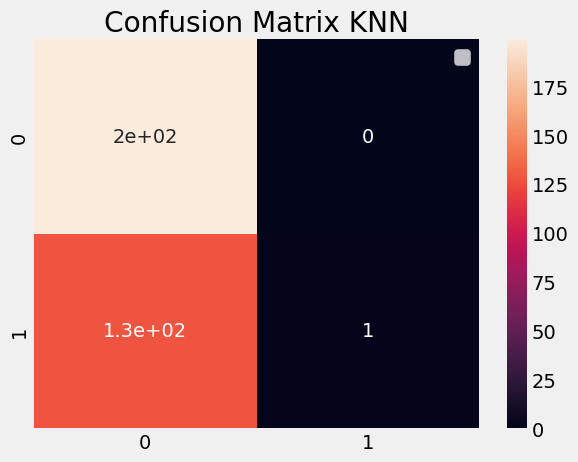

In [65]:
plt.title("Confusion Matrix KNN")
sns.heatmap(confusion_matrix(y_test,pred1), annot = True)
plt.legend()
plt.show()

In [66]:
report = classification_report(y_test, y_test_pred)

print("Classification Report for K-Nearest Neighbors:\n")
print(report)

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       199
           1       0.53      0.46      0.49       129

    accuracy                           0.63       328
   macro avg       0.60      0.60      0.60       328
weighted avg       0.62      0.63      0.62       328



#**Support Vector Machine (SVM)**

In [67]:
svmc = svm.SVC()
svmc.fit(x_train, y_train)

SVC()

In [68]:
y_val_pred = svmc.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.6676829268292683


In [69]:
y_test_pred = svmc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.6676829268292683


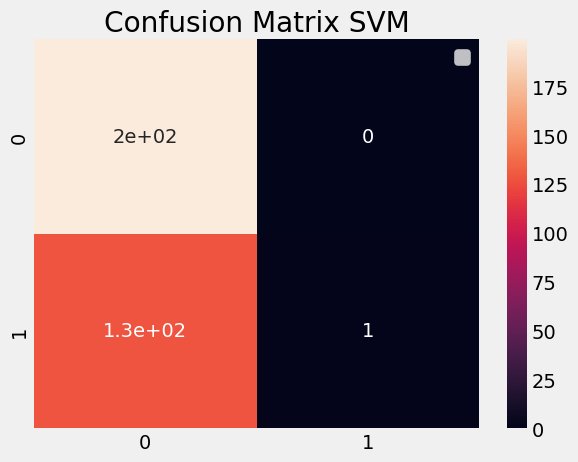

In [70]:
plt.title("Confusion Matrix SVM")
sns.heatmap(confusion_matrix(y_test,pred1), annot = True)
plt.legend()
plt.show()

In [71]:
report = classification_report(y_test, y_test_pred)

print("Classification Report for SVM:\n")
print(report)

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.66      0.91      0.77       199
           1       0.69      0.29      0.40       129

    accuracy                           0.67       328
   macro avg       0.67      0.60      0.59       328
weighted avg       0.67      0.67      0.63       328



#**Decision Tree**

In [72]:
tre = DecisionTreeClassifier()
tre = tre.fit(x_train, y_train)

In [73]:
y_val_pred = tre.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.5823170731707317


In [74]:
y_test_pred = tre.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


Testing Accuracy: 0.5853658536585366


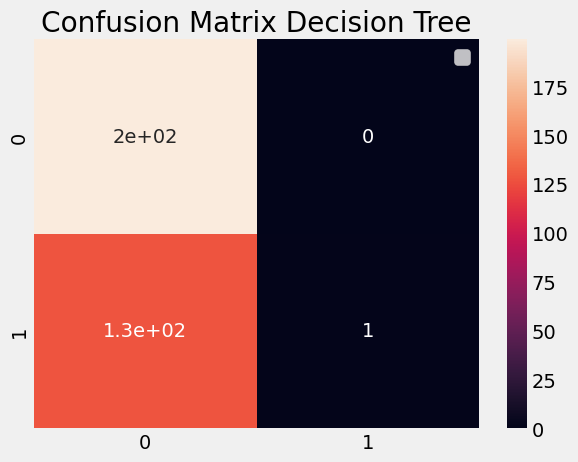

In [75]:
plt.title("Confusion Matrix Decision Tree")
sns.heatmap(confusion_matrix(y_test,pred1), annot = True)
plt.legend()
plt.show()

In [76]:
report = classification_report(y_test, y_test_pred)

print("Classification Report for Decision Tree:\n")
print(report)

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       199
           1       0.47      0.47      0.47       129

    accuracy                           0.59       328
   macro avg       0.56      0.56      0.56       328
weighted avg       0.58      0.59      0.58       328



#**Random Forest**

In [77]:
model_rf = RandomForestClassifier(n_estimators = 100, random_state = seeed)
model_rf = model_rf.fit(x_train, y_train)

In [78]:
y_val_pred = model_rf.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.6615853658536586


In [79]:
y_test_pred = model_rf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


Testing Accuracy: 0.6676829268292683


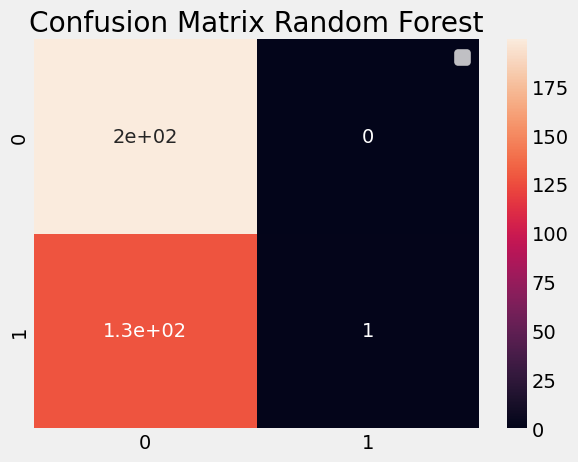

In [80]:
plt.title("Confusion Matrix Random Forest")
sns.heatmap(confusion_matrix(y_test,pred1), annot = True)
plt.legend()
plt.show()

In [81]:
report = classification_report(y_test, y_test_pred)

print("Classification Report for Random Forest:\n")
print(report)

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       199
           1       0.64      0.36      0.46       129

    accuracy                           0.67       328
   macro avg       0.66      0.61      0.61       328
weighted avg       0.66      0.67      0.64       328



# **XG Boost**

In [82]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [83]:
y_val_pred = xgb.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.625


In [84]:
y_test_pred = xgb.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.6341463414634146


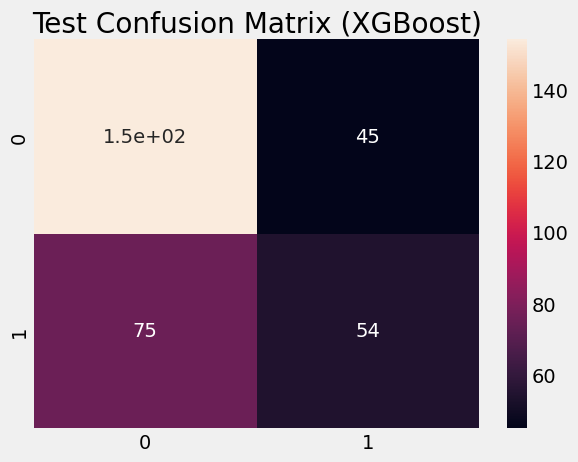

In [85]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Test Confusion Matrix (XGBoost)")
plt.show()

In [86]:
report = classification_report(y_test, y_test_pred)

print("Classification Report for XGBoost:\n")
print(report)

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       199
           1       0.55      0.42      0.47       129

    accuracy                           0.63       328
   macro avg       0.61      0.60      0.60       328
weighted avg       0.62      0.63      0.62       328

